In [106]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# Velocity reward function with all constants parameterized
def velocity_reward(velocity, distance, a, b, c, d, e, f, g, g2, h):
    vel_cap = g - a * velocity**4
    zero_at_target = vel_cap - b * distance * np.exp(-c * distance * np.abs(velocity))
    no_zero_while_error = np.exp(-(g2 / (d * distance + h)) * np.abs(velocity))
    reward = no_zero_while_error * zero_at_target
    reward = np.exp(0.4*reward)
    reward *= np.exp(-f * np.abs(distance))
    return reward

# Interactive plot function
def plot_reward(
    a=0.05, b=3.0, c=3.0, d=20.0, e=0.2, f=2.0, g=1.0, g2=1.0, h=0.1
):
    velocity_vals = np.linspace(-3, 3, 200)
    distance_vals = np.linspace(0.01, 1.5, 200)
    velocity_grid, distance_grid = np.meshgrid(velocity_vals, distance_vals)
    
    reward_grid = velocity_reward(velocity_grid, distance_grid, a, b, c, d, e, f, g, g2, h)
    
    plt.figure(figsize=(8, 6))
    colormap = plt.contourf(
        velocity_grid, distance_grid, reward_grid,
        levels=40, cmap='seismic',
        vmin=-np.max(np.abs(reward_grid)),
        vmax=np.max(np.abs(reward_grid))
    )
    plt.colorbar(colormap, label='Reward')
    plt.xlabel('Velocity')
    plt.ylabel('Distance')
    plt.title('Velocity-Based Reward Function (Diverging Colormap)')
    plt.tight_layout()
    plt.show()

# second plot zoomed in on 0,0
def plot_reward_zoomed(
    a=0.05, b=3.0, c=3.0, d=20.0, e=0.2, f=2.0, g=1.0, g2=1.0, h=0.1
):
    velocity_vals = np.linspace(-1, 1, 200)
    distance_vals = np.linspace(0, 0.1, 200)
    velocity_grid, distance_grid = np.meshgrid(velocity_vals, distance_vals)
    
    reward_grid = velocity_reward(velocity_grid, distance_grid, a, b, c, d, e, f, g, g2, h)
    
    plt.figure(figsize=(8, 6))
    colormap = plt.contourf(
        velocity_grid, distance_grid, reward_grid,
        levels=200, cmap='seismic',
        vmin=-np.max(np.abs(reward_grid)),
        vmax=np.max(np.abs(reward_grid))
    )
    plt.colorbar(colormap, label='Reward')
    plt.xlabel('Velocity')
    plt.ylabel('Distance')
    plt.title('Velocity-Based Reward Function (Zoomed In)')
    plt.tight_layout()
    plt.show()

def plot(
    a=0.05, b=3.0, c=3.0, d=20.0, e=0.2, f=2.0, g=1.0, g2=1.0, h=0.1
):
    plot_reward(a, b, c, d, e, f, g, g2, h)
    plot_reward_zoomed(a, b, c, d, e, f, g, g2, h)
    print(
        f"Parameters: a={a}, b={b}, c={c}, d={d}, e={e}, f={f}, g={g}, g2={g2}, h={h}"
    )
# Set up the interactive plot
# Initial plot
# Sliders for all parameters
interact(
    plot,
    a=FloatSlider(min=0.0, max=1, step=0.005, value=0.05, description='a'),
    b=FloatSlider(min=0.0, max=100.0, step=0.1, value=30.0, description='b'),
    c=FloatSlider(min=0.0, max=100.0, step=0.1, value=50.0, description='c'),
    d=FloatSlider(min=0.0, max=50.0, step=1.0, value=20.0, description='d'),
    e=FloatSlider(min=0.0, max=1.0, step=0.01, value=0.2, description='e'),
    f=FloatSlider(min=0.0, max=5.0, step=0.1, value=2.0, description='f'),
    g=FloatSlider(min=0.0, max=10.0, step=0.05, value=3.0, description='g (vel cap base)'),
    g2=FloatSlider(min=0.0, max=5.0, step=0.1, value=2.0, description='g2 (exp numerator)'),
    h=FloatSlider(min=0.0, max=1.0, step=0.01, value=0.1, description='h (exp offset)')
)

interactive(children=(FloatSlider(value=0.05, description='a', max=1.0, step=0.005), FloatSlider(value=30.0, d…

<function __main__.plot(a=0.05, b=3.0, c=3.0, d=20.0, e=0.2, f=2.0, g=1.0, g2=1.0, h=0.1)>

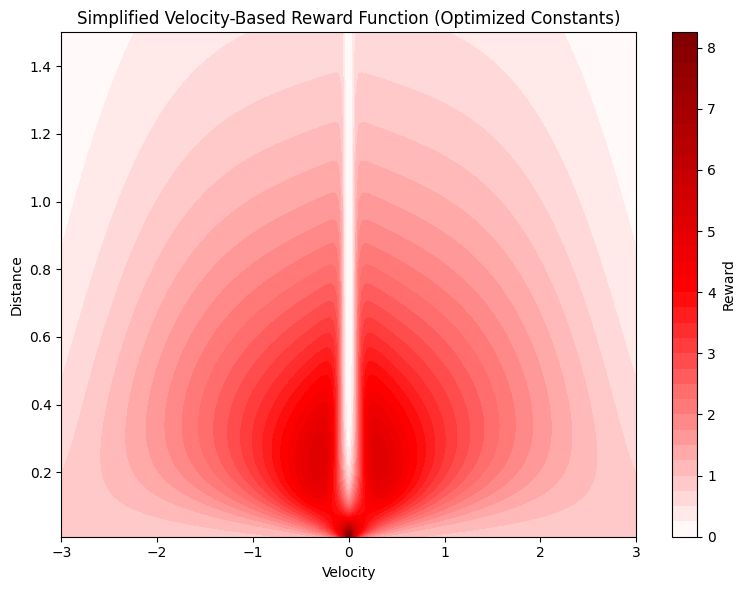

In [101]:
import numpy as np
import matplotlib.pyplot as plt

# Simplified velocity reward function with constants written in-place
def simplified_velocity_reward(velocity, distance):
    vel_cap = 5.0 - 0.05 * velocity**4
    zero_at_target = 30.0 * distance * np.exp(-50.0 * distance * np.abs(velocity))
    shaping = np.exp(-(2.0 / (20.0 * distance + 0.1)) * np.abs(velocity))
    reward = shaping * (vel_cap - zero_at_target)
    reward =  np.exp(0.5*reward)
    reward *= np.exp(-2.0 * np.abs(distance))
    return reward

# Compute grid
velocity_vals = np.linspace(-3, 3, 200)
distance_vals = np.linspace(0.01, 1.5, 200)
velocity_grid, distance_grid = np.meshgrid(velocity_vals, distance_vals)

# Compute reward over grid
reward_grid = simplified_velocity_reward(velocity_grid, distance_grid)

# Plot
plt.figure(figsize=(8, 6))
colormap = plt.contourf(
    velocity_grid, distance_grid, reward_grid,
    levels=40, cmap='seismic',
    vmin=-np.max(np.abs(reward_grid)),
    vmax=np.max(np.abs(reward_grid))
)
plt.colorbar(colormap, label='Reward')
plt.xlabel('Velocity')
plt.ylabel('Distance')
plt.title('Simplified Velocity-Based Reward Function (Optimized Constants)')
plt.tight_layout()
plt.show()

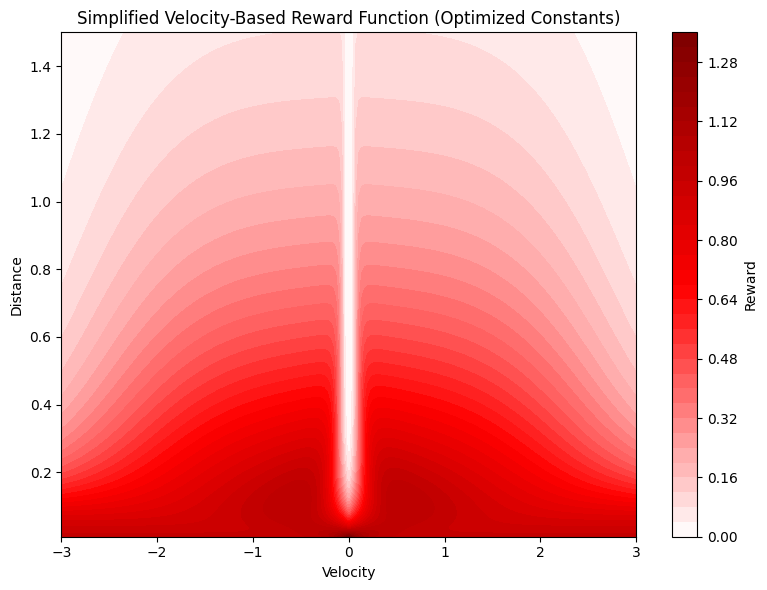

In [108]:
import jax.numpy as jp
def tracking_reward(velocity, distance):
        vel_cap = 1 - 0.05 * velocity**4
        zero_at_target = 30.0 * distance * jp.exp(-50.0 * distance * jp.abs(velocity))
        no_zero_while_error = jp.exp(-(2.0 / (20.0 * distance + 0.1)) * jp.abs(velocity))
        reward = no_zero_while_error * (vel_cap - zero_at_target)
        reward = jp.exp(0.5 * reward)
        reward *= jp.exp(-2.0 * jp.abs(distance))
        return reward


# Compute grid
velocity_vals = np.linspace(-3, 3, 200)
distance_vals = np.linspace(0.01, 1.5, 200)
velocity_grid, distance_grid = np.meshgrid(velocity_vals, distance_vals)

# Compute reward over grid
reward_grid = tracking_reward(velocity_grid, distance_grid)

# Plot
plt.figure(figsize=(8, 6))
colormap = plt.contourf(
    velocity_grid, distance_grid, reward_grid,
    levels=40, cmap='seismic',
    vmin=-np.max(np.abs(reward_grid)),
    vmax=np.max(np.abs(reward_grid))
)
plt.colorbar(colormap, label='Reward')
plt.xlabel('Velocity')
plt.ylabel('Distance')
plt.title('Simplified Velocity-Based Reward Function (Optimized Constants)')
plt.tight_layout()
plt.show()